In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train_dir = pathlib.Path('/content/drive/My Drive/AI Project/Dataset2/train')
validation_dir = pathlib.Path('/content/drive/My Drive/AI Project/Dataset2/validation')

In [ ]:
train_withmask = pathlib.Path('/content/drive/My Drive/AI Project/Dataset2/train/with_mask')
train_withoutmask = pathlib.Path('/content/drive/My Drive/AI Project/Dataset2/train/without_mask')
validation_withmask = pathlib.Path('/content/drive/My Drive/AI Project/Dataset2/validation/with_mask')
validation_withoutmask = pathlib.Path('/content/drive/My Drive/AI Project/Dataset2/validation/without_mask')

In [ ]:
num_withmask_tr = len(list(train_withmask.glob('*.jpg')))
num_withoutmask_tr = len(list(train_withoutmask.glob('*.jpg')))
num_withmask_val = len(list(validation_withmask.glob('*.jpg')))
num_withoutmask_val = len(list(validation_withoutmask.glob('*.jpg')))

total_train = num_withmask_tr + num_withoutmask_tr
total_val = num_withmask_val + num_withoutmask_val

In [ ]:
print(num_withmask_tr)
print(num_withoutmask_tr)
print(num_withmask_val)
print(num_withoutmask_val)
print(total_train)
print(total_val)

499
686
191
187
1185
378


In [ ]:
batch_size = 64
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1185 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 378 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid 
# with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

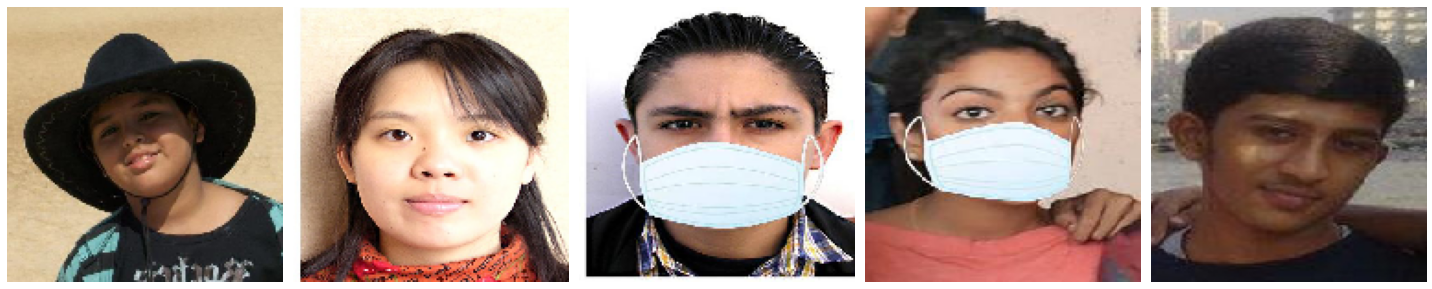

In [ ]:
plotImages(sample_training_images[:5])

creating model

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 20736)           

train model

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
18/18 [==============================] - 7s 375ms/step - loss: 0.6848 - accuracy: 0.6120 - val_loss: 0.3188 - val_accuracy: 0.9125
Epoch 2/10
18/18 [==============================] - 7s 381ms/step - loss: 0.2131 - accuracy: 0.9206 - val_loss: 0.1020 - val_accuracy: 0.9688
Epoch 3/10
18/18 [==============================] - 7s 365ms/step - loss: 0.0968 - accuracy: 0.9634 - val_loss: 0.0867 - val_accuracy: 0.9750
Epoch 4/10
18/18 [==============================] - 7s 377ms/step - loss: 0.0613 - accuracy: 0.9777 - val_loss: 0.0971 - val_accuracy: 0.9812
Epoch 5/10
18/18 [==============================] - 7s 368ms/step - loss: 0.0358 - accuracy: 0.9875 - val_loss: 0.0848 - val_accuracy: 0.9844
Epoch 6/10
18/18 [==============================] - 7s 365ms/step - loss: 0.0267 - accuracy: 0.9929 - val_loss: 0.1144 - val_accuracy: 0.9750
Epoch 7/10
18/18 [==============================] - 6s 352ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.1840 - val_accuracy: 0.9656
Epoch 

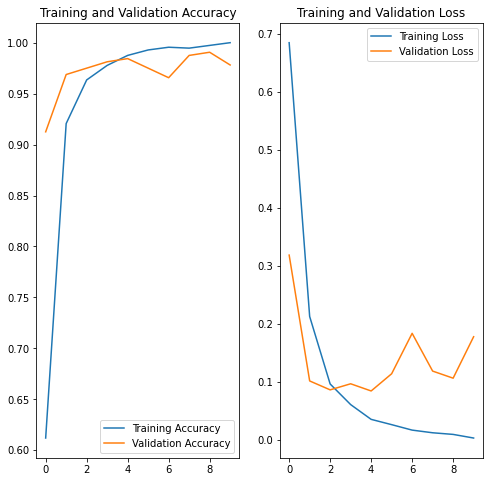

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model Score :
[[1924.1207]]
**Class 1 is with mask, Class 0 is without mask**
Class: [[1]]


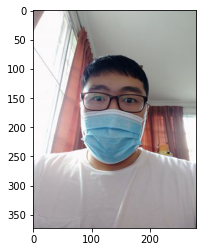

In [ ]:
import cv2
import matplotlib.image as mpimg

img = cv2.imread("/content/drive/My Drive/AI Project/Dataset/Face mask/facemask.jpg")
img = cv2.resize(img,(150,150))
img_rows=img.shape[0]
img_cols=img.shape[1]
img = np.reshape(img,[1,150,150,3])
plt.imshow(mpimg.imread('/content/drive/My Drive/AI Project/Dataset/Face mask/facemask.jpg'))
print('Model Score :',model.predict(img))
print('**Class 1 is with mask, Class 0 is without mask**')
print('Class:',model.predict_classes(img))



Model Score : [[-1285.4166]]
**Class 1 is with mask, Class 0 is without mask**
Class: [[0]]


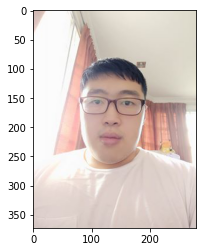

In [ ]:

img = cv2.imread("/content/drive/My Drive/AI Project/Dataset/No face mask/nofacemask.jpg")
img = cv2.resize(img,(150,150))
img_rows=img.shape[0]
img_cols=img.shape[1]
img = np.reshape(img,[1,150,150,3])
plt.imshow(mpimg.imread('/content/drive/My Drive/AI Project/Dataset/No face mask/nofacemask.jpg'))
print('Model Score :',model.predict(img))
print('**Class 1 is with mask, Class 0 is without mask**')
print('Class:',model.predict_classes(img))